# Simple Linear Regression

## Reading and Understanding the Data

#### 1.Importing data using the pandas library

#### 2.Understanding the structure of the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# visualising the Data

### Let's now visualise our data using seaborn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

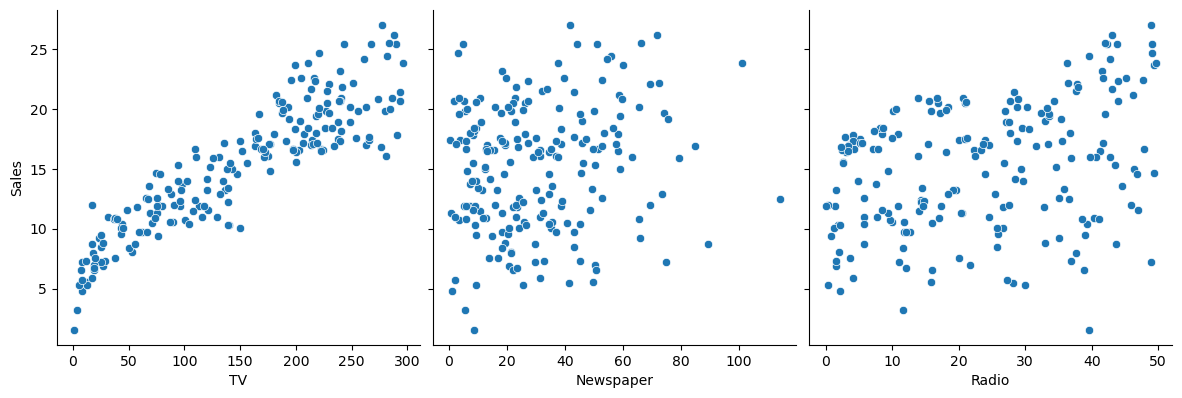

In [8]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

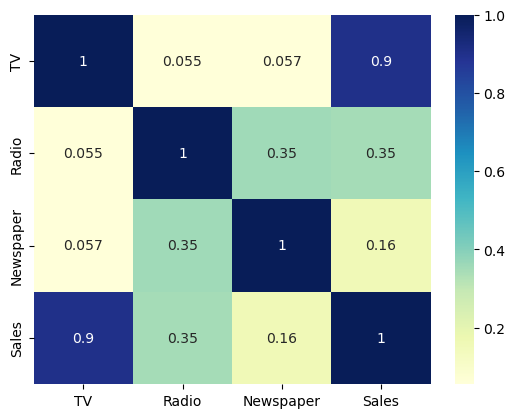

In [9]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.show()

 As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable

# Performing Simple Linear Regression

### Formula
𝑦=𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛+c / 𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛

#### .𝑦 is the response
#### .𝑐 is the intercept
#### .𝑚1 is the coefficient for the first feature
#### .𝑚𝑛 is the coefficient for the nth feature

𝑦=𝑐+𝑚1×𝑇𝑉
 

The  𝑚 values are called the model coefficients or model parameters.

In [10]:
X = advertising['TV']
y = advertising['Sales']

### Train-Test Split

You'll perform this by importing train_test_split from the sklearn.model_selection library.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### Builing a Linear Model

You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [14]:
import statsmodels.api as sm

In [15]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.52e-52
Time:                        14:15:40   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### 𝑆𝑎𝑙𝑒𝑠=6.948+0.054×𝑇𝑉

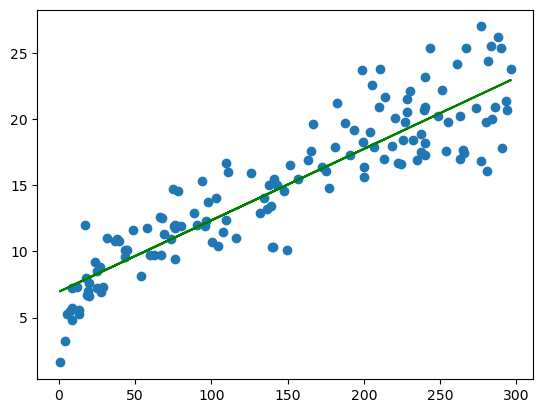

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'g')
plt.show()

In [19]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

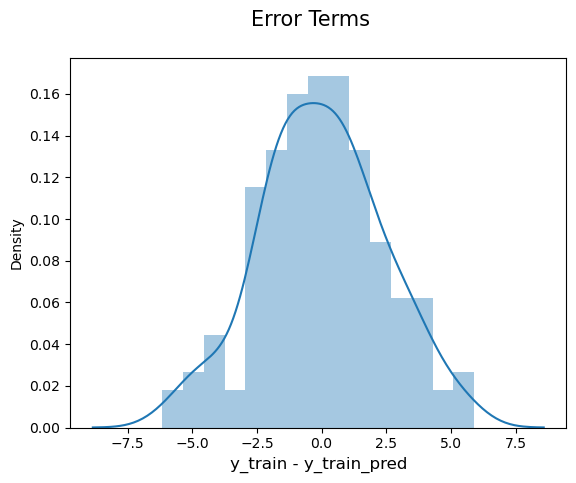

In [20]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 12)
plt.show()

The residuals are following the normally distributed with a mean 0.

#### Looking for patterns in the residuals

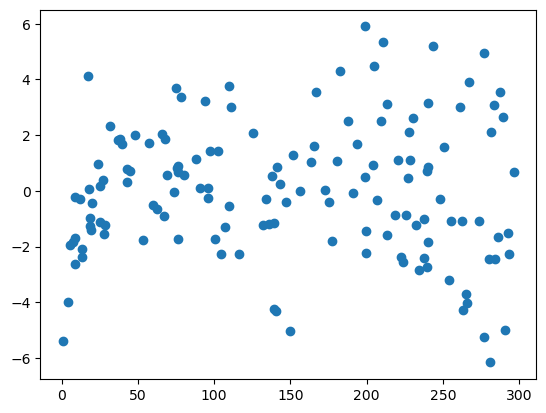

In [21]:
plt.scatter(X_train,res)
plt.show()

In [22]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [23]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
 np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

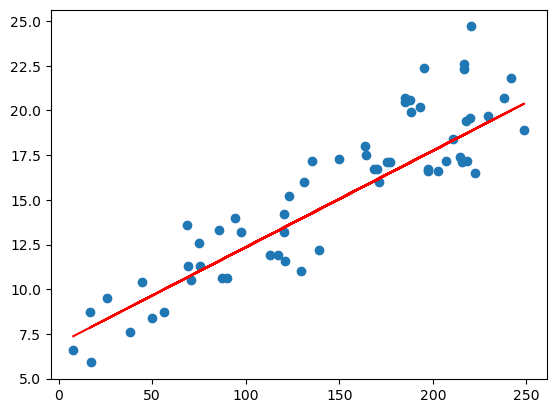

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

## Linear Regression using linear_model in sklearn

Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. 

In [27]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
X_train_lm.shape

(140,)

In [29]:
X_test_lm.shape

(60,)

In [30]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [31]:
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

In [32]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

LinearRegression()
##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
##### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [34]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


The equationwe get is the same as what we got before!

𝑆𝑎𝑙𝑒𝑠=6.948+0.054∗𝑇𝑉
 

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

Type Markdown and LaTeX: 𝛼2

In [35]:
import numpy as np

In [36]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [37]:
corrs[0,1] **2

0.8157933136480386